In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plotter
import random
%matplotlib inline

# Artificial Dataset created using Y = 0.5X² + 1.5X - 1000
dataset = pd.read_csv('./datasets/polynomial-regression.csv')
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       2000 non-null   int64  
 1   Y       2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,X,Y
0,-534,121678.0
1,-739,148049.0
2,-457,115610.0
3,-211,153068.0
4,-614,143516.0


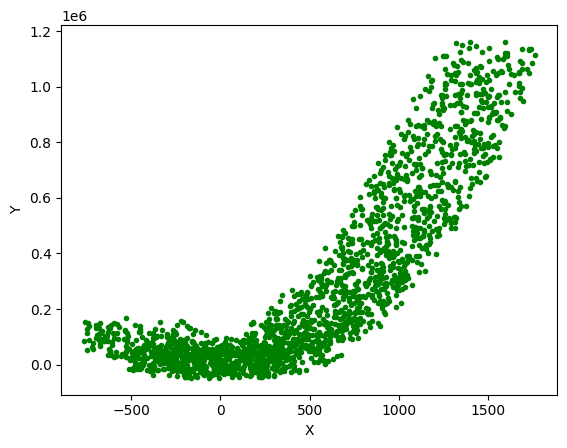

In [135]:
# Visualizing Data
plotter.xlabel('X')
plotter.ylabel('Y')
plotter.scatter(dataset['X'], dataset['Y'], marker='.', color = 'green')

In [136]:
from sklearn.model_selection import train_test_split

X = dataset[['X']]
Y = dataset['Y']
(X_Train, X_Test, Y_Train, Y_Test) = train_test_split(X, Y, test_size = 0.25, random_state = 55)

Model Trained : Y = 294356.0366666667 + 279156.0458914915.X


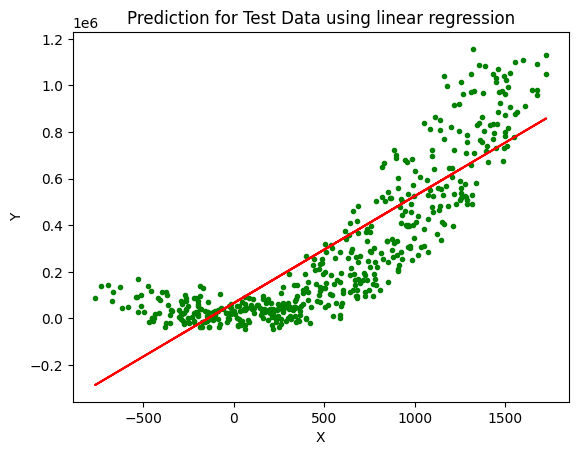

In [137]:
# Train Linear Regression Model

# Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Train)

X_Train_Norm = scaler.transform(X_Train)
X_Test_Norm = scaler.transform(X_Test)

# Train
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_Train_Norm, Y_Train)

# Predict and Visualize
Y_Predicted = model.predict(X_Test_Norm)
plotter.title('Prediction for Test Data using linear regression')
plotter.xlabel('X')
plotter.ylabel('Y')
plotter.scatter(X_Test, Y_Test, marker = '.', color = 'green')
plotter.plot(X_Test, Y_Predicted, color = 'red')

print(f'Model Trained : Y = {model.intercept_} + {model.coef_[0]}.X')

In [138]:
# Performance Analysis for Linear Regression Model
from sklearn.metrics import root_mean_squared_error as rmse, mean_absolute_error as mae, r2_score as r2

print(f'Root Mean Square Error : {rmse(Y_Test, Y_Predicted)}')
print(f'Mean Absolute Error : {mae(Y_Test, Y_Predicted)}')
print(f'R² Score : {round(100*r2(Y_Test, Y_Predicted),2)}%')

Root Mean Square Error : 166795.58223716955
Mean Absolute Error : 137657.53605765032
R² Score : 72.38%


In [139]:
# Now apply Polynomial Transformation

from sklearn.preprocessing import PolynomialFeatures
# make polynomial scaler object
polytransform = PolynomialFeatures(degree = 2, include_bias = False)            

polytransform.fit(X_Test)         # learn parameters of transformed input features

X_Train2 = polytransform.transform(X_Train)     # Add Another feature of Degree 2
X_Test2 = polytransform.transform(X_Test)

print(pd.DataFrame(X_Train2).head(5))
print()
print(pd.DataFrame(X_Test2).head(5))

        0          1
0  -398.0   158404.0
1  1256.0  1577536.0
2   612.0   374544.0
3  -530.0   280900.0
4  -267.0    71289.0

       0         1
0 -291.0   84681.0
1 -185.0   34225.0
2 -453.0  205209.0
3  976.0  952576.0
4  681.0  463761.0


Model Trained : Y = 294356.0366666667 + 72027.46384287029.X + 242908.2444298625.X²


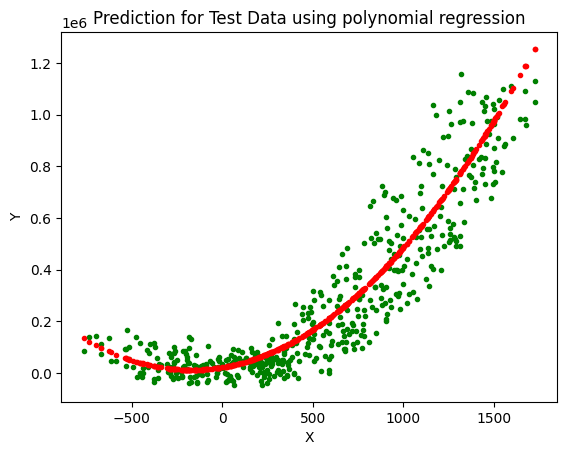

In [140]:
# Training Linear Model with Transformation Applied

# Standardize
scaler.fit(X_Train2)

X_Train2_Norm = scaler.transform(X_Train2)
X_Test2_Norm = scaler.transform(X_Test2)

# Train

model2 = LinearRegression()
model2.fit(X_Train2_Norm, Y_Train)

# Predict and Visualize
Y_Predicted2 = model2.predict(X_Test2_Norm)
plotter.title('Prediction for Test Data using polynomial regression')
plotter.xlabel('X')
plotter.ylabel('Y')
plotter.scatter(X_Test, Y_Test, marker = '.', color = 'green')
plotter.scatter(X_Test, Y_Predicted2, color = 'red', marker = '.')

print(f'Model Trained : Y = {model2.intercept_} + {model2.coef_[0]}.X + {model2.coef_[1]}.X²')

In [141]:
# Performance Analysis for Polynomial Regression Model for Degree = 2

print(f'Root Mean Square Error : {rmse(Y_Test, Y_Predicted2)}')
print(f'Mean Absolute Error : {mae(Y_Test, Y_Predicted2)}')
print(f'R² Score : {round(100*r2(Y_Test, Y_Predicted2),2)}%')

Root Mean Square Error : 116705.00652204877
Mean Absolute Error : 87620.43131089554
R² Score : 86.48%


In [142]:
# Note :- We can keep applying transformation and increasing the degree
#         But we have to find a optimal degree beyond which increasing produces no significant accuracy improvement

Model Trained : Y = 294356.03666666674 + 72632.61109298289.X + 330131.3613544925.X² + -90002.30248305807.X³


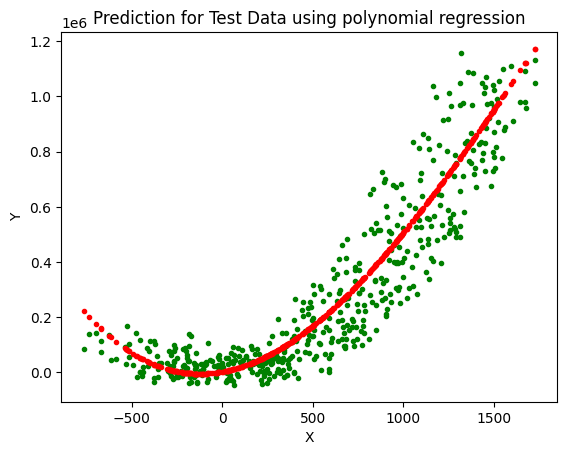

In [143]:
# Introducing degree 3 for input feature X

# transformation
polytransform = PolynomialFeatures(degree = 3, include_bias = False)            

polytransform.fit(X_Test)         # learn parameters of transformed input features

X_Train3 = polytransform.transform(X_Train)     # Add Another feature of Degree 2
X_Test3 = polytransform.transform(X_Test)

# Standardize
scaler.fit(X_Train3)

X_Train3_Norm = scaler.transform(X_Train3)
X_Test3_Norm = scaler.transform(X_Test3)

# Train

model3 = LinearRegression()
model3.fit(X_Train3_Norm, Y_Train)

# Predict and Visualize
Y_Predicted3 = model3.predict(X_Test3_Norm)
plotter.title('Prediction for Test Data using polynomial regression')
plotter.xlabel('X')
plotter.ylabel('Y')
plotter.scatter(X_Test, Y_Test, marker = '.', color = 'green')
plotter.scatter(X_Test, Y_Predicted3, color = 'red', marker = '.')

print(f'Model Trained : Y = {model3.intercept_} + {model3.coef_[0]}.X + {model3.coef_[1]}.X² + {model3.coef_[2]}.X³')

In [144]:
# Performance Analysis for Polynomial Regression Model for Degree = 3

print(f'Root Mean Square Error : {rmse(Y_Test, Y_Predicted3)}')
print(f'Mean Absolute Error : {mae(Y_Test, Y_Predicted3)}')
print(f'R² Score : {round(100*r2(Y_Test, Y_Predicted3),2)}%')

# We can see that the performance improvement is negligible.
# Hence we can stop at degree 2

Root Mean Square Error : 116237.36237166688
Mean Absolute Error : 88201.793948086
R² Score : 86.59%


In [145]:
# Code Used to Create Dataset

# X = [x for x in range(-500, 1500)]
# Y = [0.5*x**2 + 1.5*x - 1000 for x in X]

# X = [x + random.randint(-300, 300) for x in X]
# Y = [y + random.randint(-50000, 50000) for y in Y]

# plotter.scatter(X, Y, marker='.')

# df = pd.DataFrame({'X':X,'Y':Y})
# df.to_csv('./datasets/polynomial-regression.csv', index = False)